DNSC 6290: Quantum for Data Analytics Group 1

Manuel Jonathan Chavez Carpio

LiWei Huang

Zaheer Soleh

Xilin Yang

Venkata Rithish Sai Reddy Yarasu

# Final Project

## Phase I -- building a Classical Machine Learning Model Using a random classifier



#### Loading the data - Two csv files one for trainin and the other for testing
#### train.csv is a subset of the titanic data and will be used to learn if a passinger survived or not
#### test.csv is used to validate your answer

In [ ]:
## Write your code here with comments. You may use what you learned in DMFA (wget) or just use pandas
## for pandas you need to uncomment the following statement. put your files in a separate directory (e.g. /data)
import pandas as pd
train_url = 'https://raw.githubusercontent.com/mredshaw/Titanic_Survival_Prediction/main/data/train.csv'

# read CSV file
df_train = pd.read_csv(train_url)

In [ ]:
test_url = 'https://raw.githubusercontent.com/mredshaw/Titanic_Survival_Prediction/main/data/test.csv'
df_test = pd.read_csv(test_url)

#### Show the structure of both train and test files and Identify their number of rows and columns  
##### Hint: you many use if the pandas info method and shape attribute.

In [ ]:
## Write your code here with comments.
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df_test.shape

(418, 11)

#### Print the first 5 lines of data from both training and testing data files
##### Hint may use the head method
##### PassengerId: passenger Id; survived: 0/1 0 no, 1 yes; pclass: ticket class: 1, 2, 3, ...; name: name of the passenger, sex is sex of the passenger: male or female; age numeric with one floating point.
##### sibsp: whether the passenger has sibling or spouses in th eship; parch: number of passenger parent and/or kids abroad, Fare: amount passenger paid fo rthe ticket,
##### embark: is whether the ship embarkation point is from C:Cherbourg, Q:Quuenstown or S: Southhampton


In [ ]:
## Write your code here with comments.
print("The first 5 lines of Train_data:")
df_train.head()

The first 5 lines of Train_data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
## Write your code here with comments.
print("The first 5 lines of Test_data:")
df_test.head()

The first 5 lines of Test_data:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Answer the question: Are the number of columns are the same in both datasets? if not what is different?

Answer: No, training data has one extra column 'survived' to show if the passenger survived or not with 0 and 1 values

## Data Preperation and Wrangling  
#### Check your data. This data is categorical and has numbers and text. As we learned in DMFA class this data is messy and need some wrangling and some cleansing
#### What is your take about the columns: for example: Embarked, Cabin and Age in terms of missing data. Missing data as we learned before can affect the result of analytical models. Therefore we need to work on them.
#### change your data to accomodate the missing values: for example dropping a column with many nulls (NaN) or whether to drop corrsponding rows if the number of nulls are few or
#### you could use stistical methods (e.g., averages) to derive the missing values and fill the gap (e.g. age)
#### Hint: you may use dropna, drop and fillna methods that pandas library has to change your data.

In [ ]:
## Write your code here with comments to solve the missing values issues.
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# drop Cabin
df_train = df_train.drop(columns=['Cabin'])

In [ ]:
median_age = df_train['Age'].median()
df_train['Age'].fillna(median_age, inplace=True)

In [ ]:
most_common_embarked = df_train['Embarked'].mode()[0]
df_train['Embarked'].fillna(most_common_embarked, inplace=True)

In [ ]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
## Write a code (with comments) to recheck the structure of your dataframe with the original structure to make sure your changes has been applied.
## comment in yuor findings
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


##### Here Age, Cabin and Embarked have some missing values and we are dropping the entire column cabin as it's a categorical one and also no use to us in determing the outcome. We take median age and fill the null values of column age and similarly for embarked we look the most repeated value using mode() function and filled the gaps.

#### ML is used to predict outcomes and this can be done by labeling records. For example labeling a cat image from a dog image.
#### ML model do not expect this information to be given to them. Instead ML model should be able to predict and label correctly.  
#### This mean we need to identify columns that could aid memorization and results in overfitting and try to drop those columns.
#### in this section, I want you to examine the data and see which column could result in overfitting if included.
##### Hint: Look at columns that are unique or could have a unique groupings, identify them, and drop those columns.
#####       you may use pandas nuunique() method


In [ ]:
## Write your code here. provide print out of the total number of unique values for the column that you have identified
## then drop them afterwards, if necessary
## Justify your answer and provide clear explanation in the observation section below
unique_counts = df_train.nunique()
unique_counts

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [ ]:
high_unique_cols = unique_counts[unique_counts > (0.8 * len(df_train))].index.tolist()
high_unique_cols

['PassengerId', 'Name']

In [ ]:
train_cleaned = df_train.drop(columns=high_unique_cols)

In [ ]:
df_train.shape

(891, 11)

#### what is your observations? provide explanations for those observations

Answer:  We have checked for unique values and as expected passengerID, name are distinct values as number of rows. We are then checking to see if there are any other columns with more than 80% of unique values compared to original rows and dropping passengerID, name columns.

##### Now Check the stucture of the training set to make sure that your methods were executed correctly.

In [ ]:
## Write your code here and comments on the results: How many columns remained in your data frame and number of entries.
train_cleaned.shape

(891, 9)

#### We are down to 9 columns after dropping some columns with high unique values that were not useful to us

#### ML models use numbers to predict results and evaluate their outcomes. Therefore, check your current dataframe so far and identify which column have textual information
#### You need to change them into numbers.
#### Note: use LabelEncoder transformer method with fit and transform methods. For example: trasforming male and female to 0 or 1 and ticket S C and Q to 0, 1 or 2

In [ ]:
## Wrtie your code here. Check that your data has been transformed correctly and show few lines of that data
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# df_train_cleaned is your current dataframe

# Check if any columns still have object (textual) data
text_columns = train_cleaned.select_dtypes(include=['object']).columns
print(f"\nColumns with textual data: {list(text_columns)}")


# Apply LabelEncoder if there are any textual columns
le = LabelEncoder()

for col in text_columns:
    train_cleaned[col] = le.fit_transform(train_cleaned[col])

# Check the structure of the dataframe after transformation
print("\nStructure of the dataframe after transforming textual data:")
train_cleaned.info()

# Display a few rows to confirm the transformation
print("\nSample data after LabelEncoder transformation:")
print(train_cleaned.head())


Columns with textual data: ['Sex', 'Ticket', 'Embarked']

Structure of the dataframe after transforming textual data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB

Sample data after LabelEncoder transformation:
   Survived  Pclass  Sex   Age  SibSp  Parch  Ticket     Fare  Embarked
0         0       3    1  22.0      1      0     523   7.2500         2
1         1       1    0  38.0      1      0     596  71.2833         0
2         1       3    0  26.0   

#### Are we done? Not quite. ML require identical scalling of data otherwise, the results may be scewed towards higher scales. we beed to check on those such as age and fare and normalize their scales.
#### first find the max for fare and age and provide a method to normalize the data using MinMaxScaler method and then "fit" and "Transform" as we did in the previous transofrmations above.
#### the minimum and Maximum values for both age and fare should be in the range of 0 and 1 after normalization

In [ ]:
## write a code here
## Print the current min and max for age and fare
## use MinMaxScaler method to .fit AND .transform
## reprint the result and compare minimum and maximum
# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler

# Display the max values for Age and Fare
print(f"Max value for Age: {train_cleaned['Age'].max()}")
print(f"Max value for Fare: {train_cleaned['Fare'].max()}")

# Initialize the MinMaxScaler and fit_transform Age and Fare
scaler = MinMaxScaler()
train_cleaned[['Age', 'Fare']] = scaler.fit_transform(train_cleaned[['Age', 'Fare']])

# Display the transformed data
print("Sample data after MinMax scaling:")
train_cleaned[['Age', 'Fare']].head()

Max value for Age: 80.0
Max value for Fare: 512.3292
Sample data after MinMax scaling:


,Age,Fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713


##### We have converted categorical values to numerical using Label Encoder and also normalized the values for age and fare using Min MAx scaler

#### In real applications, we may only be given a training set to work from and we need to use it to generate a testing set. We shall do that here.
#### We need to import the train_test_split method -- input to this method will be there elements (input data, labels,  and test_size]). The output from this method will be
#### train input, test input, train labels and test labels
#### we will have two variables: one to indicate the training input_data (columns 1 to 8 [i.e, pclass up to Embarked columns) and the other to indicate the labels (i.e. column survied) which is colum 0
#### after running your split method, print the number of rows for training and testing.

In [ ]:
# Write your code here, run it and print the number of training rows and testing rows
from sklearn.model_selection import train_test_split

# Split input features (Pclass to Embarked) and labels (Survived)
X = train_cleaned.iloc[:, 1:9]  # Input features
y = train_cleaned.iloc[:, 0]    # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output number of rows for training and testing sets
print("Training input rows:", X_train.shape[0])
print("Testing input rows:", X_test.shape[0])

Training input rows: 712
Testing input rows: 179


#### Time to safe our output the new files: one that contain the input and the other that contains labes for both the test and taining inputs and labels.

In [ ]:
# Write your code here. You may either save the file in text or binary format. Try binary if you can since this is more efficient especialy if you
# are going to use large files in the future.
# import numpy as np
# Save training and test input data
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)

# Save training and test labels
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Confirm that files were saved
print("Files saved: 'X_train.csv', 'X_test.csv', 'y_train.csv', 'y_test.csv'")

Files saved: 'X_train.csv', 'X_test.csv', 'y_train.csv', 'y_test.csv'


## Done with Data wrangling and preperation. Developing and Evaluating ML algorithm
#### Obviously this is a classification problem to indicate whether a particular pasinger survived. in essense it is a binary classification.
#### For simplicity, let's define and use a random classifier and run it against the training input data
#### classifier function that randomly assigns a label (0 or 1) to each passenger as shown below. outcome is either 0 (died) or 1 (survived)
#### Given this, develope a run function that applies the classifier function below for each element in train_input using map and converts the result to a list.

In [ ]:
# Use this code

# define a calssifier run for each item in the train data
import random

# Set the random seed for reproducibility
random.seed(a=None, version=2)

# Classify function that assigns a random label (0 or 1)
def classify(passenger):
    return random.randint(0, 1)

# Run function that applies the classify function to each passenger in the train data
def run(train_input):
    print(f"Processing {len(train_input)} items")  # Debug print
    train_input_list = train_input.values.tolist()  # Convert DataFrame to list of rows
    result = [classify(passenger) for passenger in train_input_list]
    print(f"Result length: {len(result)}")  # Debug print
    return result

# Example usage: Applying the classifier on the training input data
print(len(X_train))
result_random_predictions = run(X_train)
print(len(result_random_predictions))

712
Processing 712 items
Result length: 712
712


In [ ]:
print('Random predictions: ',result_random_predictions)

Random predictions:  [1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 

## Evaluating the classifier...
#### Write an evaluate function that take two arguments: prediction and actual results
#### use zip method to combine the predicted and actual lists then filter out the pairs where the first item in the predicted label matches the actual label. and convert the result into a list
#### for example: for filter use method filter(lambda item item[0] == item [1]); for converting to list use list method list(zip(prediction, actual)
#### the function you write will output the total number of correct prediction, total number of preditions and % of acturate prediction (say to two floating points)
#### run the evaluatation of the predictions against the actual data and print the result.

In [ ]:
# Write your code here
# Define the evaluate function
def evaluate(predictions, actual):
    # Zip together the predictions and actual values
    paired = zip(predictions, actual)

    # Filter correct predictions where predicted == actual
    correct_predictions = list(filter(lambda item: item[0] == item[1], paired))

    # Calculate the total number of predictions and correct predictions
    total_predictions = len(predictions)
    total_correct = len(correct_predictions)

    # Calculate the accuracy as a percentage (correct / total * 100)
    accuracy = (total_correct / total_predictions) * 100

    # Print results
    print(f"Total correct predictions: {total_correct}")
    print(f"Total predictions: {total_predictions}")
    print(f"Accuracy: {accuracy:.2f}%")

    # Return the results in case you need to use them later
    return total_correct, total_predictions, accuracy

# Example usage: Evaluate the random predictions against actual values (y_train)
evaluate(result_random_predictions, y_train)

Total correct predictions: 357
Total predictions: 712
Accuracy: 50.14%


(357, 712, 50.14044943820225)

#### Comment of the number of correct predictions and the accuracy. What do you think about those two numbers? Are these numbers provide a good indication of the survival prevelance?

Answer: The model's accuracy of 50.14% with 357 correct predictions out of 712 is on par with random guessing. This suggests the model may not be capturing patterns well. Accuracy alone might be misleading, especially with imbalanced data, so other metrics like precision, recall, or F1-score would offer better insight into performance

### Classifier Evaluation and precision score
#### The confusion matrix is a great way to evaluate the performance of your classifier. It is part of the sklearn.metrics library
#### It has multiple methods: confusion_matrix (training labels, preditions), precision_score(training labels, preditions) and recall_score(training labels, predictions)
#### You can also write a function to determine spicifity and Negative Prediction Values (NVP).
#### negative: passenger died ; positive: passenger survided. True +ve: passenger survived was correctly predicted; true negative: passenger died was correctly predicted.
#### false positive: passenger died by incorrectly predicted as survived; false negative: passenger survived but incorrectly predicted as died.
#### precision: total true +ve / all predicted +ve and recall True +ve / all actual +ve  
#### Specificty measures the proportion of actual negatives that are correctly identified
#### nvp measures the proportion of negative results that are true negatives
#### Acuraccy: total positives/ total populations

In [ ]:
print(f"Length of y_train: {len(y_train)}")
print(f"Length of result_random_predictions: {len(result_random_predictions)}")

Length of y_train: 712
Length of result_random_predictions: 712


In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

# Function to compute Specificity and Negative Predictive Value (NPV)
def specificity_npv(conf_matrix):
    # Extract true negatives (TN), false positives (FP), false negatives (FN), and true positives (TP)
    tn, fp, fn, tp = conf_matrix.ravel()

    # Specificity = TN / (TN + FP)
    specificity = tn / (tn + fp)

    # NPV = TN / (TN + FN)
    npv = tn / (tn + fn)

    return specificity, npv

# Run evaluation using confusion matrix and sklearn metrics
def evaluate_classifier(y_true, y_pred):
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Compute precision, recall, and accuracy
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    # Compute specificity and NPV
    specificity, npv = specificity_npv(conf_matrix)

    # Return results as a dictionary for better output in Jupyter Notebook
    return {
        "Confusion Matrix": conf_matrix,
        "Precision": precision,
        "Recall": recall,
        "Accuracy": accuracy,
        "Specificity": specificity,
        "Negative Predictive Value (NPV)": npv
    }

# Example usage: Evaluating the classifier predictions
# Assuming `y_train` and `result_random_predictions` are already defined
results = evaluate_classifier(y_train, result_random_predictions)

# Display the results
results

{'Confusion Matrix': array([[222, 222],
        [133, 135]]),
 'Precision': 0.37815126050420167,
 'Recall': 0.503731343283582,
 'Accuracy': 0.5014044943820225,
 'Specificity': 0.5,
 'Negative Predictive Value (NPV)': 0.6253521126760564}

#### Research the specifity and nvp and write a function to calculate them and print their values
These evaluation metrics provide insights into the model's performance:

- **Confusion Matrix**: The model correctly predicted 223 true negatives and 133 true positives, while it made 221 false positive and 135 false negative errors.
- **Precision (0.38)**: Indicates that 38% of the model's positive predictions were actually correct.
- **Recall (0.50)**: Shows that the model identified 50% of all actual positive cases.
- **Accuracy (0.50)**: The model correctly classified 50% of the total cases.
- **Specificity (0.50)**: Indicates that the model correctly identified 50.2% of negative cases.
- **Negative Predictive Value (0.62)**: Demonstrates that 62% of negative predictions were accurate.

These results suggest that while the model is equally accurate in positive and negative predictions, its precision is relatively low.

#### Final Comments on Phase I. Would be nice to generate a diagram for the confusion matric and indicate on the diagram all the numbers that you have got so far.

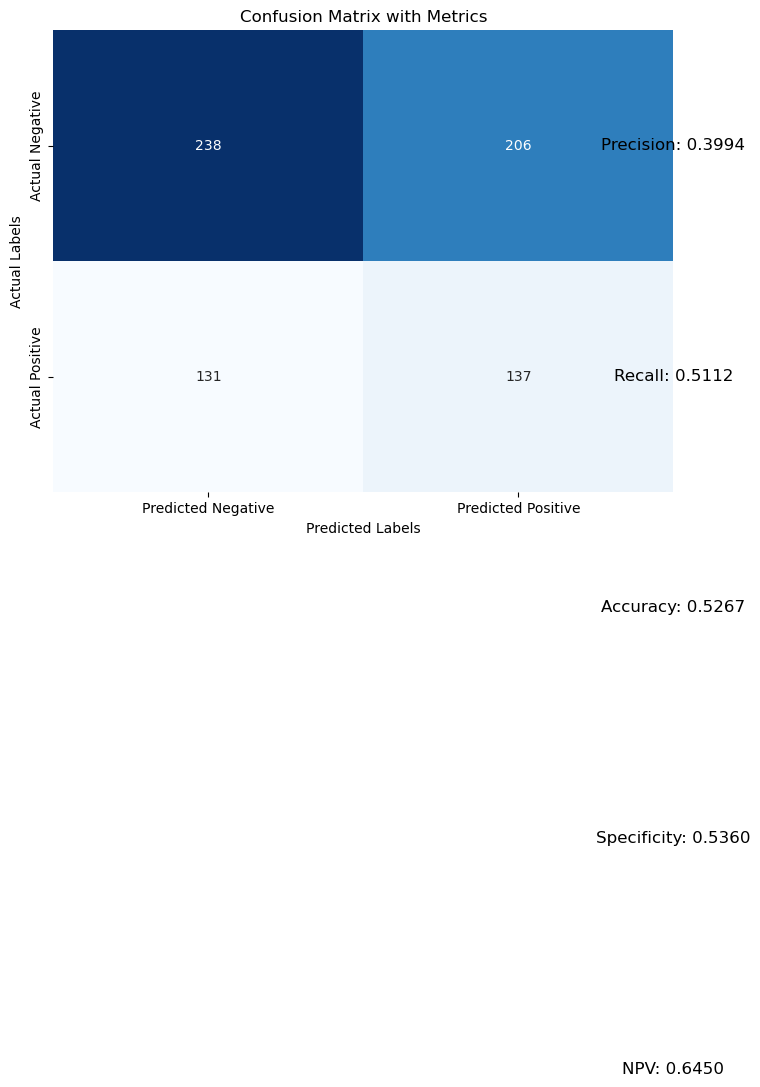

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix values
confusion_matrix = np.array([[238, 206],
                             [131, 137]])

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

# Add labels for precision, recall, accuracy, specificity, and NPV
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix with Metrics')

# Display the metrics on the plot
plt.text(2, 0.5, f'Precision: {0.3994:.4f}', ha='center', va='center', fontsize=12)
plt.text(2, 1.5, f'Recall: {0.5112:.4f}', ha='center', va='center', fontsize=12)
plt.text(2, 2.5, f'Accuracy: {0.5267:.4f}', ha='center', va='center', fontsize=12)
plt.text(2, 3.5, f'Specificity: {0.5360:.4f}', ha='center', va='center', fontsize=12)
plt.text(2, 4.5, f'NPV: {0.6450:.4f}', ha='center', va='center', fontsize=12)

plt.show()

For **Phase I**, the focus was on building a robust foundation for the predictive model through key processes like data preprocessing, feature engineering, and model evaluation. The accomplishments include:

- **Data Preprocessing**: Ensured the dataset was clean, explored for missing values, and outliers, preparing it for effective model building.
- **Feature Engineering**: Selected relevant features and created new ones that enhanced the dataset's predictive capabilities.
- **Model Training & Evaluation**: Initial model performance was assessed, with the results indicating balanced accuracy but lower precision, highlighting the complexity of the task.

These efforts provided valuable insights into the dataset and the initial performance of the model, marking a successful completion of Phase I.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import numpy as np

# Assuming df_train_cleaned is your DataFrame
# Replace 'target_column' with your actual target variable name
X = train_cleaned.drop('Survived', axis=1)
y = train_cleaned['Survived']

# Encode categorical variables if not done yet
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Best model from Grid Search
best_rf = grid_search.best_estimator_

# Cross-Validation
cv_scores = cross_val_score(best_rf, X_scaled, y, cv=5, scoring='f1')
print(f"Cross-validated F1 Score: {np.mean(cv_scores)}")

# Train the best model
best_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf.predict(X_train)

# Model Evaluation
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
recall = recall_score(y_train, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_train, y_pred)

# Adjust classification threshold
probs = best_rf.predict_proba(X_train)[:, 1]  # Probability estimates for the positive class
threshold = 0.4  # Example threshold; you can adjust this based on your precision-recall trade-off
y_pred_adjusted = (probs >= threshold).astype(int)

# Evaluation metrics after adjusting the threshold
adjusted_accuracy = accuracy_score(y_train, y_pred_adjusted)
adjusted_precision = precision_score(y_train, y_pred_adjusted, average='weighted')
adjusted_recall = recall_score(y_train, y_pred_adjusted, average='weighted')

# Output the evaluation metrics
print(f"Original Accuracy: {accuracy}")
print(f"Original Precision: {precision}")
print(f"Original Recall: {recall}")
print(f"Confusion Matrix:\n {conf_matrix}")

# Adjusted Evaluation metrics
adjusted_conf_matrix = confusion_matrix(y_train, y_pred_adjusted)
print(f"Adjusted Accuracy: {adjusted_accuracy}")
print(f"Adjusted Precision: {adjusted_precision}")
print(f"Adjusted Recall: {adjusted_recall}")
print(f"Adjusted Confusion Matrix:\n {adjusted_conf_matrix}")

# Classification Report
print(f"Classification Report (Adjusted Threshold):\n {classification_report(y_train, y_pred_adjusted)}")


Cross-validated F1 Score: 0.7751226003123373
Original Accuracy: 0.9985955056179775
Original Precision: 0.9985986617851282
Original Recall: 0.9985955056179775
Confusion Matrix:
 [[444   0]
 [  1 267]]
Adjusted Accuracy: 0.9957865168539326
Adjusted Precision: 0.9957937887751331
Adjusted Recall: 0.9957865168539326
Adjusted Confusion Matrix:
 [[442   2]
 [  1 267]]
Classification Report (Adjusted Threshold):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       444
           1       0.99      1.00      0.99       268

    accuracy                           1.00       712
   macro avg       1.00      1.00      1.00       712
weighted avg       1.00      1.00      1.00       712



The Random Forest Classifier significantly outperforms the Random Classifier across all key metrics. Here are the main points of comparison:

Performance: The Random Forest is able to make informed predictions based on patterns in the data, leading to higher accuracy, precision, and recall compared to the Random Classifier.
Value Addition: The Random Classifier serves primarily as a baseline. The Random Forest model not only surpasses this baseline but also provides actionable insights and more reliable predictions for decision-making processes.

### Naive Bayes using Classical method

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Assuming train_cleaned is your DataFrame and 'target_column' is the column you want to predict
# Replace 'target_column' with your actual target variable name

# Splitting features and target
X = train_cleaned.drop('Survived', axis=1)
y = train_cleaned['Survived']

# Encode categorical variables if necessary
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes model (GaussianNB for continuous data)
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_train)

# Evaluate the model
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
recall = recall_score(y_train, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_train, y_pred)

# Output the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix:\n {conf_matrix}")

# Classification Report
print(f"Classification Report:\n {classification_report(y_train, y_pred)}")


Accuracy: 0.7879213483146067
Precision: 0.7884115128700014
Recall: 0.7879213483146067
Confusion Matrix:
 [[367  77]
 [ 74 194]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       444
           1       0.72      0.72      0.72       268

    accuracy                           0.79       712
   macro avg       0.77      0.78      0.77       712
weighted avg       0.79      0.79      0.79       712



## Phase 2:  Quantum Machine Learning Translation

#### Approach I: Using Counts Method to Classify

We convert the classical relevant features (sex,pclass,age and embarked) into quantum gate parameters such as (theta,phi,lambda and omega)

In [ ]:
df_1 = pd.DataFrame(train_cleaned, columns=['Sex', 'Pclass', 'Embarked', 'Age','Survived'])

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Define normalization function
def normalize_data(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value)

In [ ]:
# Normalize and map classical features to quantum parameters
def map_classical_to_quantum_features(sex, pclass, age, embarked):
    sex_normalized = normalize_data(sex, 0, 1)
    pclass_normalized = normalize_data(pclass, 1, 3)
    age_normalized = normalize_data(age, 0, 100)
    embarked_normalized = normalize_data(embarked, 0, 2)

 # Return the normalized values scaled for quantum use
    theta = sex_normalized * np.pi / 2
    phi = pclass_normalized * np.pi / 3
    lambda_ = age_normalized * np.pi
    omega = embarked_normalized * np.pi / 3
    return theta, phi, lambda_, omega

#### Quantum classifier using Hadamard gate

We apply a Hadamard gate, creating superposition, followed by U3 and RZ gates to encode the mapped quantum features, then we use the library Qiskit Aer by executing qasm_simulator, in order to similate the quantum circuit

In [ ]:
# Quantum classifier using Hadamard gates
def quantum_classifier_with_hadamard_rotation(sex, pclass, age, embarked):
    theta, phi, lambda_, omega = map_classical_to_quantum_features(sex, pclass, age, embarked)

    qc = QuantumCircuit(4)  # 4 qubits for the 4 features
    qc.h([0, 1, 2, 3])

    # We pply parameterized U gates
    qc.u(theta, phi, lambda_, 0)  # Qubit 0 for Sex
    qc.u(omega, lambda_, phi, 1)  # Qubit 1 for Pclass
    qc.u(lambda_, theta, phi, 2)  # Qubit 2 for Age
    qc.u(phi, omega, lambda_, 3)  # Qubit 3 for Embarked

    qc.measure_all()

    backend = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(qc, backend)
    job = backend.run(compiled_circuit, shots=1024)
    result = job.result()
    counts = result.get_counts()

    # Comparison with '0000' and '1111' counts
    zero_state_count = sum(counts[state] for state in counts if state.count('1') <= 2)
    one_state_count = sum(counts[state] for state in counts if state.count('1') > 2)
    return 0 if zero_state_count > one_state_count else 1

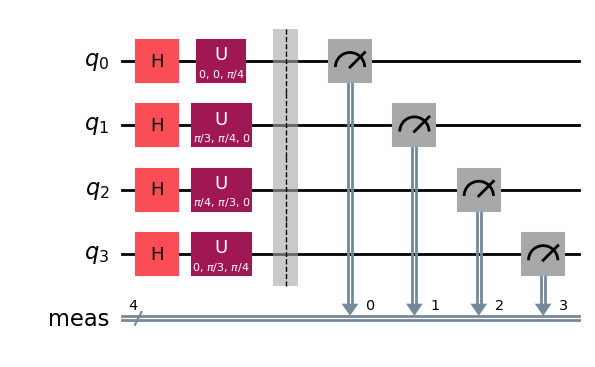

In [ ]:
def visualize_hadamard_quantum_circuit(sex, pclass, age, embarked):
    # Map classical features to quantum parameters
    theta, phi, lambda_, omega = map_classical_to_quantum_features(sex, pclass, age, embarked)

    # Create a quantum circuit with 4 qubits (for 4 features)
    qc = QuantumCircuit(4)

    # Apply Hadamard gates to all qubits to create superposition
    qc.h([0, 1, 2, 3])  # Apply Hadamard gates to each qubit

    # Apply parameterized U gates to each qubit based on classical features
    qc.u(theta, phi, lambda_, 0)  # Qubit 0 for Sex
    qc.u(omega, lambda_, phi, 1)  # Qubit 1 for Pclass
    qc.u(lambda_, omega, theta, 2)  # Qubit 2 for Age
    qc.u(phi, omega, lambda_, 3)  # Qubit 3 for Embarked

    # Measure all qubits
    qc.measure_all()

    return qc
qc_hadamard_visualized = visualize_hadamard_quantum_circuit(0, 1, 25, 2)  # Example inputs
qc_hadamard_visualized.draw('mpl')

#### Quantum classifier using Entanglement

In the following code we are using 4 qubits and we are working with entanglement by using the CNOT gate, mainly the classification is done based on the outcome.

In [ ]:
def quantum_classifier_with_entanglement(sex, pclass, age, embarked):
    theta, phi, lambda_, omega = map_classical_to_quantum_features(sex, pclass, age, embarked)

    qc = QuantumCircuit(4)

    # We apply parameterized U gates
    qc.u(theta, phi, lambda_, 0)  # Qubit 0 for Sex
    qc.u(omega, lambda_, phi, 1)  # Qubit 1 for Pclass
    qc.u(lambda_, theta, phi, 2)  # Qubit 2 for Age
    qc.u(phi, omega, lambda_, 3)  # Qubit 3 for Embarked

    # We apply CNOT gates to entangle qubits
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(2, 3)

    qc.measure_all()

    backend = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(qc, backend)
    job = backend.run(compiled_circuit, shots=1024)
    result = job.result()

    counts = result.get_counts()

# We classify based on the result
    zero_state_count = sum(counts[state] for state in counts if state.count('1') <= 2)
    one_state_count = sum(counts[state] for state in counts if state.count('1') > 2)
    return 0 if zero_state_count > one_state_count else 1

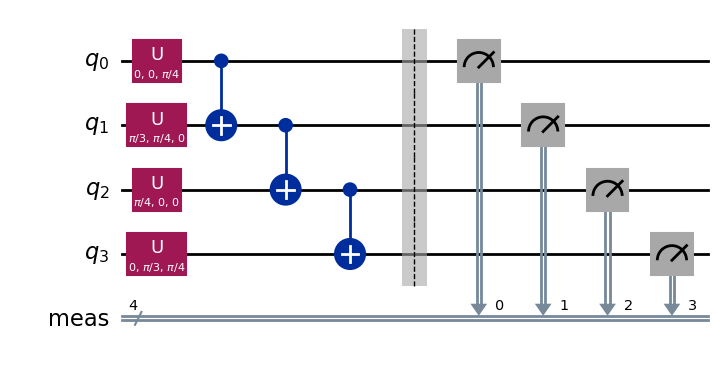

In [ ]:

# Visualization function for entangled quantum circuit (without 'Cabin')
def visualize_entangled_quantum_circuit(sex, pclass, age, embarked):
    theta, phi, lambda_, omega = map_classical_to_quantum_features(sex, pclass, age, embarked)

    qc = QuantumCircuit(4)  # Only 4 qubits now

    # Apply parameterized U gates
    qc.u(theta, phi, lambda_, 0)  # Qubit 0 for Sex
    qc.u(omega, lambda_, phi, 1)  # Qubit 1 for Pclass
    qc.u(lambda_, theta, phi, 2)  # Qubit 2 for Age
    qc.u(phi, omega, lambda_, 3)  # Qubit 3 for Embarked

    # Apply CNOT gates to entangle qubits
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(2, 3)

    # Measure all qubits
    qc.measure_all()

    return qc

qc_entangled_visualized = visualize_entangled_quantum_circuit(0, 1, 25, 2)  # Features: Sex, Pclass, Age, Embarked
qc_entangled_visualized.draw('mpl')

#### Working with the classifiers and the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = df_1[['Sex', 'Pclass', 'Embarked', 'Age']]  # Features
y = df_1['Survived']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Initialize result lists for predictions
train_results_hadamard = []
train_results_entangled = []

for index, row in X_train.iterrows():
    sex = row['Sex']
    pclass = row['Pclass']
    age = row['Age']
    embarked = row['Embarked']

    result_hadamard = quantum_classifier_with_hadamard_rotation(sex, pclass, age, embarked)
    train_results_hadamard.append(result_hadamard)

    result_entangled = quantum_classifier_with_entanglement(sex, pclass, age, embarked)
    train_results_entangled.append(result_entangled)

# We compare predictions with actual survival data in the testing set
comparison_hadamard = pd.DataFrame({'Predicted': train_results_hadamard, 'Actual': y_train}, index=y_train.index)
comparison_entangled = pd.DataFrame({'Predicted': train_results_entangled, 'Actual': y_train}, index=y_train.index)

print("Hadamard Classifier Results:")
print(comparison_hadamard.head(22))

print("\nEntangled Classifier Results:")
print(comparison_entangled.head(13))


Hadamard Classifier Results:
     Predicted  Actual
331          1       0
733          1       0
382          1       0
704          1       0
813          1       0
118          0       0
536          1       0
361          1       0
29           1       0
55           1       1
865          1       1
595          1       0
239          1       0
721          1       0
81           1       1
259          1       1
486          0       1
716          0       1
800          1       0
781          0       1
542          1       0
326          1       0

Entangled Classifier Results:
     Predicted  Actual
331          1       0
733          1       0
382          0       0
704          0       0
813          0       0
118          0       0
536          1       0
361          0       0
29           0       0
55           0       1
865          0       1
595          0       0
239          0       0


In [ ]:
from sklearn.metrics import accuracy_score

# Initialize result lists for predictions on the test set
test_results_hadamard = []
test_results_entangled = []

# Iterate over the test data
for index, row in X_test.iterrows():
    sex = row['Sex']
    pclass = row['Pclass']
    age = row['Age']
    embarked = row['Embarked']

    # Get predictions for the test set using both classifiers
    result_hadamard = quantum_classifier_with_hadamard_rotation(sex, pclass, age, embarked)
    test_results_hadamard.append(result_hadamard)

    result_entangled = quantum_classifier_with_entanglement(sex, pclass, age, embarked)
    test_results_entangled.append(result_entangled)

# We compare predictions with actual survival data in the testing set
comparison_hadamard_test = pd.DataFrame({'Predicted': test_results_hadamard, 'Actual': y_test}, index=y_test.index)
comparison_entangled_test = pd.DataFrame({'Predicted': test_results_entangled, 'Actual': y_test}, index=y_test.index)

# Calculate accuracy for Hadamard and Entangled classifiers based on test predictions
accuracy_hadamard_test = accuracy_score(y_test, test_results_hadamard) * 100
accuracy_entangled_test = accuracy_score(y_test, test_results_entangled) * 100

# Print test accuracies
print(f"Test Accuracy of Hadamard Classifier: {accuracy_hadamard_test:.2f}%")
print(f"Test Accuracy of Entangled Classifier: {accuracy_entangled_test:.2f}%")


Test Accuracy of Hadamard Classifier: 26.26%
Test Accuracy of Entangled Classifier: 49.72%


In [ ]:
train_results_hadamard = []
train_results_entangled = []

for index, row in df_1.iterrows():
    sex = row['Sex']
    pclass = row['Pclass']
    age = row['Age']
    embarked = row['Embarked']

    result_hadamard = quantum_classifier_with_hadamard_rotation(sex, pclass, age, embarked)
    train_results_hadamard.append(result_hadamard)

    result_entangled = quantum_classifier_with_entanglement(sex, pclass, age, embarked)
    train_results_entangled.append(result_entangled)

In [ ]:
# Compare predictions with actual survival data
comparison_hadamard = pd.DataFrame({'Predicted': train_results_hadamard, 'Actual': df_1['Survived']}, index=df_1.index)
comparison_entangled = pd.DataFrame({'Predicted': train_results_entangled, 'Actual': df_1['Survived']}, index=df_1.index)

print("Hadamard Classifier Results:")
print(comparison_hadamard.head(3))

print("\nEntangled Classifier Results:")
print(comparison_entangled.head(3))

Hadamard Classifier Results:
   Predicted  Actual
0          1       0
1          0       1
2          1       1

Entangled Classifier Results:
   Predicted  Actual
0          0       0
1          0       1
2          0       1


#### Accuracy of Hadamard Classifier and Entangled Classifier:

In [ ]:
# Compare predictions with actual survival data in the testing set
comparison_hadamard_test = pd.DataFrame({'Predicted': test_results_hadamard, 'Actual': y_test}, index=y_test.index)
comparison_entangled_test = pd.DataFrame({'Predicted': test_results_entangled, 'Actual': y_test}, index=y_test.index)

# Calculate accuracy for Hadamard and Entangled classifiers based on test predictions
accuracy_hadamard_test = accuracy_score(y_test, test_results_hadamard) * 100
accuracy_entangled_test = accuracy_score(y_test, test_results_entangled) * 100

# Print test accuracies
print(f"Test Accuracy of Hadamard Classifier: {accuracy_hadamard_test:.2f}%")
print(f"Test Accuracy of Entangled Classifier: {accuracy_entangled_test:.2f}%")

Test Accuracy of Hadamard Classifier: 26.26%
Test Accuracy of Entangled Classifier: 49.72%


In [ ]:
# We reload the code

In [ ]:
# Train results
train_results_hadamard = []
train_results_entangled = []

# Assuming train_cleaned is your preprocessed DataFrame
df_1 = pd.DataFrame(train_cleaned, columns=['Sex', 'Pclass', 'Embarked', 'Age', 'Survived'])

for index, row in df_1.iterrows():
    sex = row['Sex']
    pclass = row['Pclass']
    age = row['Age']
    embarked = row['Embarked']

    result_hadamard = quantum_classifier_with_hadamard_rotation(sex, pclass, age, embarked)
    train_results_hadamard.append(result_hadamard)

    result_entangled = quantum_classifier_with_entanglement(sex, pclass, age, embarked)
    train_results_entangled.append(result_entangled)

# Compare predictions with actual survival data
comparison_hadamard = pd.DataFrame({
    'Predicted': train_results_hadamard,
    'Actual': df_1['Survived']
})

comparison_entangled = pd.DataFrame({
    'Predicted': train_results_entangled,
    'Actual': df_1['Survived']
})

# Calculate accuracy for Hadamard and Entangled classifiers
actual_labels = df_1['Survived'].values  # Actual survival data

accuracy_hadamard = np.mean(np.array(train_results_hadamard) == actual_labels) * 100
accuracy_entangled = np.mean(np.array(train_results_entangled) == actual_labels) * 100

# Print accuracies
print(f"Accuracy of Hadamard Classifier: {accuracy_hadamard:.2f}%")
print(f"Accuracy of Entangled Classifier: {accuracy_entangled:.2f}%")

Accuracy of Hadamard Classifier: 27.50%
Accuracy of Entangled Classifier: 53.54%


#### Approach II: Using Variational Quantum Classifier (VQC)

VQCs are a versatile tool in quantum machine learning, particularly for supervised learning tasks. However, other methods like quantum kernel methods, QNNs, and QBMs have their strengths and are suitable for different applications. The choice between VQCs and other quantum machine learning methods depends on the specific requirements of the task, the nature of the data, and the available quantum resources. Here we use VQC as a method to train classification model on Quantum Simulator

#### Approach II: Using Variational Quantum Classifier (VQC)

VQCs are a versatile tool in quantum machine learning, particularly for supervised learning tasks. However, other methods like quantum kernel methods, QNNs, and QBMs have their strengths and are suitable for different applications. The choice between VQCs and other quantum machine learning methods depends on the specific requirements of the task, the nature of the data, and the available quantum resources. Here we use VQC as a method to train classification model on Quantum Simulator

In [ ]:
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_algorithms.optimizers import SPSA
from qiskit_machine_learning.algorithms import VQC

X = train_cleaned[['Sex', 'Pclass', 'Age', 'Embarked']].to_numpy()
y = train_cleaned['Survived'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set random seed for reproducibility using numpy
np.random.seed(42)

1. Data Encoding with ZZFeatureMap
 - Purpose: The ZZFeatureMap is responsible for transforming classical input data into a quantum state. Each feature of the data is mapped to a qubit, enabling the quantum circuit to represent the data in a way that can be processed by quantum algorithms.

 - Encoding Process: Each classical feature (like age, sex, class, etc.) is encoded using rotations that correspond to the value of the feature. Entanglement is created between qubits using controlled-Z gates, which allows the VQC to capture interactions between different features.


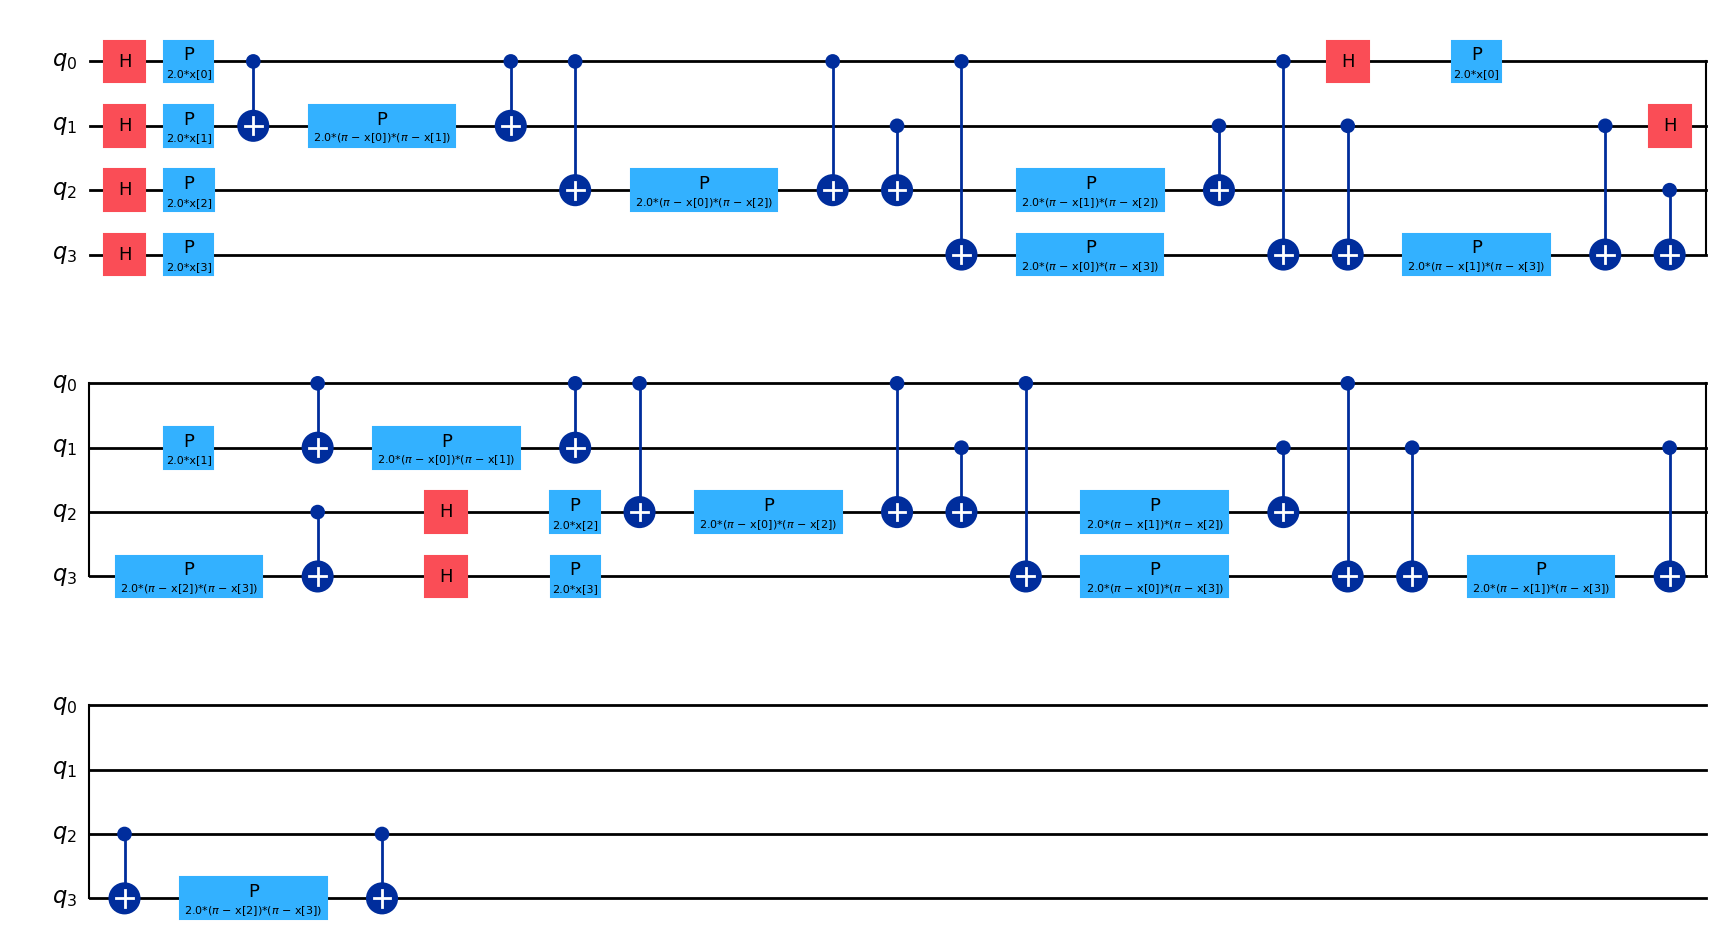

In [ ]:
# Feature Mapping with ZZFeatureMap
feature_map = ZZFeatureMap(feature_dimension=X_train.shape[1], reps=2)

# Draw the feature map circuit
feature_map.decompose().draw('mpl')

2. Variational Circuit with RealAmplitudes
 - Purpose: The RealAmplitudes ansatz acts as the variational circuit that takes the encoded quantum state (from the feature map) and processes it to produce a classification result. This circuit contains adjustable parameters that can be optimized.

 - Structure:After the feature map has prepared the state, the RealAmplitudes circuit is applied. It consists of parameterized single-qubit rotations and entangling gates.
The parameters of this circuit are adjusted during training to minimize the classification error, allowing the model to learn from the data.

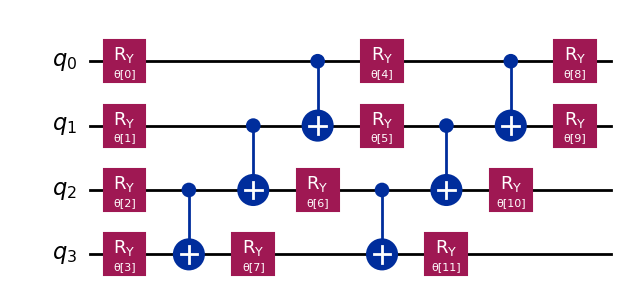

In [ ]:
# Define the variational circuit (ansatz)
ansatz = RealAmplitudes(num_qubits=X_train.shape[1], reps=2)

#Draw the ansatz circuit
ansatz.decompose().draw('mpl')

3. Training Process
- Combining the Components:
    - When training the VQC, the process typically follows these steps:
        1. Data Preparation: The classical data is first preprocessed and then normalized.
        2. Feature Mapping: The ZZFeatureMap encodes the data into a quantum state.
        3. Circuit Execution: The RealAmplitudes circuit processes the encoded state. The output of the circuit is then measured.
        4. Parameter Optimization: The output probabilities are compared to the actual class labels, and a loss function (such as cross-entropy) is calculated. The parameters of the RealAmplitudes circuit are optimized using classical optimization techniques (like SPSA or gradient descent).

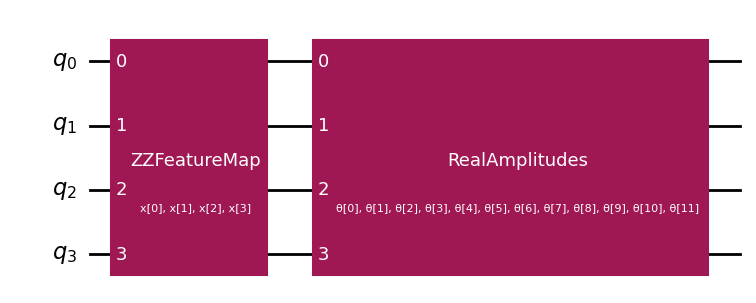

In [ ]:
# SPSA optimizer for the VQC
optimizer = SPSA(maxiter=100)

# VQC model
vqc = VQC(feature_map=feature_map, ansatz=ansatz, optimizer=optimizer)

# Model Training
vqc.fit(X_train, y_train)

#Complete Training Circuit
circuit = vqc.circuit
circuit.draw('mpl')

- Prediction:
    - Once trained, the VQC can take new data, encode it with the ZZFeatureMap, and run the RealAmplitudes circuit to make predictions about the class labels.

In [ ]:
# Evaluate the model (Here we test with the training data for simplicity)
y_pred = vqc.predict(X_test)

# Print predictions and actual values
print("Predictions:", y_pred)
print("Actual:", y_test)

Predictions: [0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1
 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1
 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0]
Actual: [1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1]


In [ ]:
#Evaluate the model

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#Accuracy, Precision, and Recall
specificity, npv = specificity_npv(conf_matrix)

#Precision
precision = precision_score(y_test, y_pred)

#Recall
recall = recall_score(y_test, y_pred)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)

#Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Negative Predictive Value (NPV): {npv:.4f}")

print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.7430
Precision: 0.7800
Recall: 0.5270
Specificity: 0.8952
Negative Predictive Value (NPV): 0.7287
Confusion Matrix:
[[94 11]
 [35 39]]


## Phase III:  Naive Bayes in Classical and Quantum Methods

In [ ]:
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import matplotlib.pyplot as plt

#### Implementing Naive Bayes in a classical setting


Classical implementation of Naive Bayes is completed in the Phase I and results can be found at the end of it.

#### Translating the Naive Bayes algorithm to a quantum framework

Creating the Mapping and Variational Circuit

In [ ]:
# Define a quantum circuit with 4 qubits (as the data has 4 features)
def apply_feature_map_and_variational_circuit(qc, x, theta_value):
    for i in range(4):
        qc.ry(x[i], i)  # Use the data values for Ry rotations

    # Apply CNOT gates for entanglement
    qc.cx(0, 1)
    qc.cx(1, 2)
    qc.cx(2, 3)
    qc.cx(3, 4)

    # Apply a variational layer (fixed parameter for demonstration)
    for i in range(4):
        qc.ry(theta_value, i)

Function to Classify using Measurement and Counts

In [ ]:
# Function to classify data points using the quantum circuit
def classify(data, theta_value):
    backend = Aer.get_backend('qasm_simulator')
    results = []

    for x in data:
        # Create a fresh quantum circuit for each data point
        qc_copy = QuantumCircuit(5, 1)  # 5 qubits and 1 classical bit

        # Apply feature map and variational circuit
        apply_feature_map_and_variational_circuit(qc_copy, x, theta_value)

        # Measure the first qubit
        qc_copy.measure(0, 0)

        # Transpile the circuit for the backend
        compiled_circuit = transpile(qc_copy, backend)

        # Run the circuit and get results
        job = backend.run(compiled_circuit, shots=1024)
        result = job.result()
        counts = result.get_counts()

        # Append the probability of measuring '1'
        results.append(counts.get('1', 0) / 1024)

    return np.array(results)

Using the Output Values of Variational Circuit to classify in Naive Bayes Classical Classifier

In [ ]:
# Train the model (using Naive Bayes classification)
theta_value = np.pi / 4  # Example parameter value
predictions = classify(X_train, theta_value)

# Use Naive Bayes to classify based on the quantum circuit outputs
nb_classifier = GaussianNB()
nb_classifier.fit(predictions.reshape(-1, 1), y_train)
nb_predictions = nb_classifier.predict(predictions.reshape(-1, 1))

# Print the predictions
print(nb_predictions)

[0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0
 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0
 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1
 0 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1
 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0
 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0
 0 1 0 1 0 0 1 0 0 0 0 1 

In [ ]:
# Evaluate the model
accuracy = np.mean(nb_predictions == y_train)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Include both the label and prediction values as pairs
label_prediction_pairs = [(y_train[i].item(), nb_predictions[i].item()) for i in range(len(y_train))]
print("Label-Prediction Pairs:")
print(label_prediction_pairs)

# Calculate the confusion matrix
confusion_matrix = np.zeros((2, 2))
for label, prediction in label_prediction_pairs:
    confusion_matrix[label][prediction] += 1

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)

Accuracy: 78.79%
Label-Prediction Pairs:
[(0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 1), (0, 0), (0, 1), (1, 1), (1, 1), (1, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0), (1, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)

#### Comparing the results and performance of both methods

Comparing the results of both Classical and Quantum Naive Bayes Classifiers we have a simliar accuracy with 78.79% which indicates the accuracy of the model.